In [16]:
import numpy as np
import tensorflow as tf
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from tensorflow.image import resize
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [95]:
img = image.load_img('dog1.jpg')

In [96]:
img.size

(1024, 682)

In [97]:
target_size = 224
img = img.resize((target_size, target_size))

In [98]:
img.size

(224, 224)

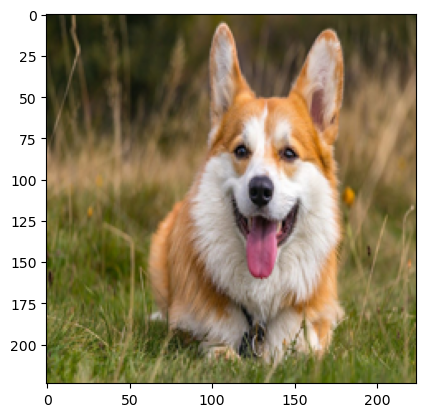

In [99]:
plt.imshow(np.asarray(img))

In [100]:
np_img = image.img_to_array(img)
np_img.shape

(224, 224, 3)

In [101]:
img_batch = np.expand_dims(img, axis=0)
img_batch.shape

(1, 224, 224, 3)

In [102]:
pre_processed = preprocess_input(img_batch)

In [103]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [192]:
decode_predictions(y_preds, top=10)[0]

[('n02113023', 'Pembroke', 0.93083215),
 ('n02113186', 'Cardigan', 0.06450462),
 ('n02106030', 'collie', 0.00052180025),
 ('n02105855', 'Shetland_sheepdog', 0.00036341546),
 ('n02109961', 'Eskimo_dog', 0.0003500563),
 ('n02115641', 'dingo', 0.00034284915),
 ('n02119022', 'red_fox', 0.0002892387),
 ('n04254680', 'soccer_ball', 0.00028394203),
 ('n02105412', 'kelpie', 0.00026120574),
 ('n02094258', 'Norwich_terrier', 0.00026011842)]

In [ ]:
#################################################################################

In [20]:
#model = VGG16(weights='imagenet', include_top=True) #모델 불러오기

def image_classify(img_path):
    model = VGG16(weights='imagenet', include_top=True) #모델 불러오기
    img = image.load_img(img_path)
    np_img = image.img_to_array(img)
    img_batch = np.expand_dims(img, axis=0)
    pre_processed = preprocess_input(img_batch)
    
    # 이미지 분류 예측
    ypred = model.predict(pre_processed)
    decoded_predictions = decode_predictions(ypred, top=5)[0]
    
    # 분류 결과를 문자열로 생성
    results = ""
    for i, (imagenetID, label, score) in enumerate(decoded_predictions):
        results += f"{i + 1}: {label} ({score:.2f})\n"
        
    # 결과를 출력
    result_label.configure(text=results)

In [21]:
def open_image():
    file_path = filedialog.askopenfilename(title="Select image", filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        img = Image.open(file_path)
        img = img.resize((224, 224))  # VGG16 모델 입력 크기로 조정
        img.save(file_path)
        img_tk = ImageTk.PhotoImage(img)
        panel.configure(image=img_tk)
        panel.image = img_tk
        
        # 이미지 분류 호출
        image_classify(file_path)

In [23]:
import tkinter as tk
from tkinter import filedialog, ttk

window = tk.Tk()

window.title('이미지 분류기')
window.geometry('400x400')
window.resizable(False, False)

# 이미지 선택 버튼
btn_select_img = tk.Button(window, text="이미지 파일 선택하기",
                           command=open_image,
                           width=35, font=("Arial", 11))
btn_select_img.grid(row=0, column=0, padx=35, pady=10)

panel = tk.Label(window)
panel.grid(row=1, column=0, pady=10)

result_label = tk.Label(window, text='')
result_label.grid(row=2, column=0, pady=10)

window.mainloop()

1/1 [==============================] - 0s 173ms/step
